**Frequenzmodulation mit einem Basisband-Ton**

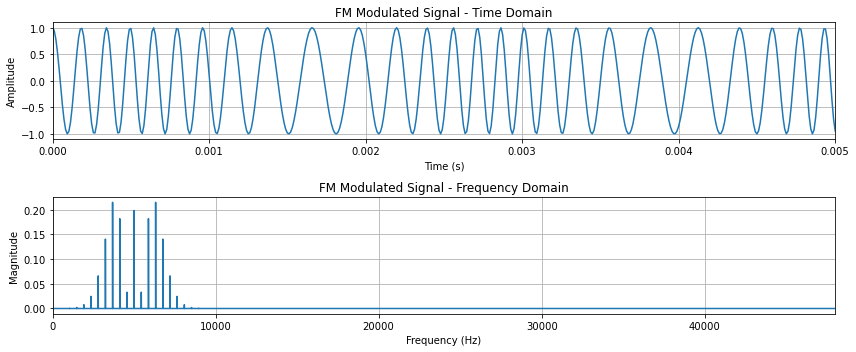

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Parameters
fs = 96000  # Sampling rate (Hz)
duration = 2  # Duration of signal (seconds)
t = np.arange(0, duration, 1/fs)  # Time vector

fc = 5000  # Carrier frequency (Hz)
fm = 440   # Modulating frequency (Hz)
eta = 4 # # Modulation index
delta_f = eta * fm # Frequency deviation

# Modulating signal
mod_signal = np.sin(2 * np.pi * fm * t)


# FM modulated signal
# Compute integral of modulation signal
int_ub = (1/fs) * np.cumsum(mod_signal)  # Discrete-time integration

# FM modulated signal
ufm = np.cos(2 * np.pi * fc * t + 2 * np.pi * delta_f * int_ub)

# Compute FFT
N = len(t)
freqs = fftfreq(N, 1/fs)
fft_values = fft(ufm) / N  # Scale FFT values correctly

# Plot time-domain signal
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(t, ufm)
plt.title("FM Modulated Signal - Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.005)  # Show only a few cycles
plt.grid(True)

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]))
plt.title("FM Modulated Signal - Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, fs/2)
plt.grid(True)

plt.tight_layout()
plt.show()

Audio(data = mod_signal, rate = fs)

**Bessel-Funktionen**

Darstellung der Amplitudenverteilung als Funktion des Modulationsindexes:

eta = delta_f/fm

J_0 -> Träger

J_1 -> 1. Seitenband-Paar

...

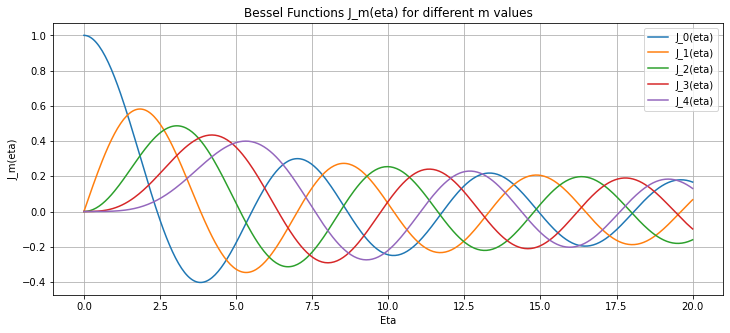

In [85]:
from scipy.special import jn
eta = np.linspace(0, 20, 400)
m_values = [0, 1, 2, 3, 4]  # Example orders of Bessel functions

# Plot the Bessel functions for different m values
plt.figure(figsize=(12, 5))

for m in m_values:
    plt.plot(eta, jn(m, eta), label=f'J_{m}(eta)')
    

plt.title('Bessel Functions J_m(eta) for different m values')
plt.xlabel('Eta')
plt.ylabel('J_m(eta)')
plt.legend()
plt.grid(True)
plt.show()

**Demodulation**

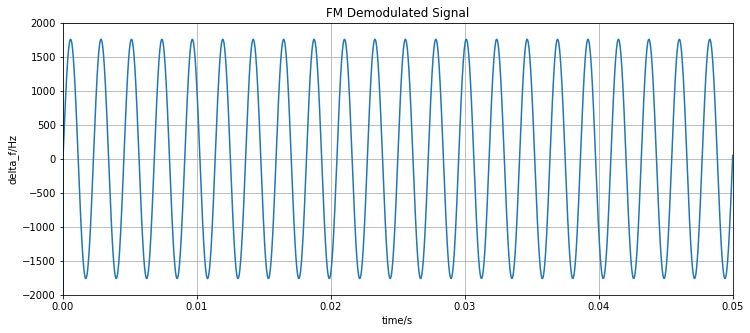

In [86]:
from IPython.display import Audio
from scipy.signal import hilbert, butter, filtfilt

# Convert real signal to complex analytic signal using Hilbert transform
analytic_signal = hilbert(ufm)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase, prepend=instantaneous_phase[0]) * fs / (2.0 * np.pi)
demodulated_signal = instantaneous_frequency - np.mean(instantaneous_frequency) # remove DC

plt.figure(figsize=(12, 5))
plt.plot(t, demodulated_signal)
plt.xlim(0, 0.05)
plt.ylim(-2000, 2000)
plt.xlabel("time/s")
plt.ylabel("delta_f/Hz")
plt.title("FM Demodulated Signal")
plt.grid(True)
plt.show()

Audio(data = demodulated_signal, rate = fs)